In [2]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore') 
import talib as ta
import datetime
from tqdm import tqdm

In [3]:
from WindPy import w
w.start()
w.isconnected()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

In [4]:
import tushare as ts
ts.set_token('409d075a0cb1808e1a0ef0d015b77e580dbbce978cea08c577df4308')#设置token，只需设置一次
api = ts.pro_api()

# 调取多因子数据

In [5]:
df = pd.read_pickle('full_data.pkl')

In [6]:
df['date'] = df.reset_index()['index'].apply(lambda x:x.strftime('%Y%m%d')).tolist()

In [7]:
df

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,20050104
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110
...,...,...,...,...,...,...,...
2020-11-18,40.121746,40.334782,39.624663,40.192758,1.323015,600405.SH,20201118
2020-11-19,39.908710,40.618830,39.908710,40.263770,1.365033,600405.SH,20201119
2020-11-20,40.263770,42.181092,39.979722,41.399961,5.013187,600405.SH,20201120
2020-11-23,41.328949,41.897045,40.973889,41.399961,3.427870,600405.SH,20201123


In [8]:
df = df[(df.date<'2019-01-01')]     # (df.date>='2009-01-01') & 

In [9]:
df.head()

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,7.957941,7.978139,7.856952,7.877150,0.084750,600546.SH,20050104
2005-01-05,7.877150,8.079128,7.675172,7.685271,3.108740,600546.SH,20050105
2005-01-06,7.675172,7.715567,7.321710,7.372204,1.654045,600546.SH,20050106
2005-01-07,7.352006,7.513589,7.341908,7.412600,1.563505,600546.SH,20050107
2005-01-10,7.422699,7.473193,7.352006,7.442897,0.513000,600546.SH,20050110


# 获得沪深300成分股和权重

In [10]:
# 上证50指数：000016.SH

In [11]:
wsetdata=w.wset("IndexConstituent","date=20201124;windcode=000300.SH;field=date,wind_code,i_weight",usedf=True)

In [12]:
wsetdata[1]

,date,wind_code,i_weight
1,2020-11-02,000001.SZ,1.0160
2,2020-11-02,000002.SZ,1.1300
3,2020-11-02,000063.SZ,0.4988
4,2020-11-02,000066.SZ,0.1519
5,2020-11-02,000069.SZ,0.1649
...,...,...,...
296,2020-11-02,603799.SH,0.1687
297,2020-11-02,603833.SH,0.1325
298,2020-11-02,603899.SH,0.1813
299,2020-11-02,603986.SH,0.4024


In [13]:
# zz500_lis = wsetdata[1].wind_code.tolist()

In [14]:
hs300_lis = wsetdata[1].wind_code.tolist()

In [15]:
# sz50_lis = wsetdata[1].wind_code.tolist()

In [16]:
# zz500 = w.wset("IndexConstituent","date=20201124;windcode=000905.SH;field=date,wind_code,i_weight",usedf=True)

In [17]:
# zz = zz500[1]['wind_code'].tolist()

In [18]:
df = df[df.s.isin(hs300_lis)]

In [19]:
df

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050104
2005-01-05,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050105
2005-01-06,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050106
2005-01-07,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050107
2005-01-10,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050110
...,...,...,...,...,...,...,...
2018-12-24,10.135096,10.280625,10.114306,10.207861,0.192651,601198.SH,20181224
2018-12-25,10.093516,10.124701,9.542582,9.844037,0.392753,601198.SH,20181225
2018-12-26,9.833642,9.906406,9.740087,9.792062,0.218848,601198.SH,20181226
2018-12-27,9.968776,10.031146,9.781667,9.781667,0.256375,601198.SH,20181227


## 提取反转因子

In [20]:
close = df[['s','CLOSE']]

In [21]:
close = close.rename(columns={'s':'TICKER_SYMBOL','CLOSE':'close'})

In [22]:
tbzl = close.reset_index().groupby(['TICKER_SYMBOL','index'])[['close']].mean()

In [23]:
tbzl

close
TICKER_SYMBOL index                 
000001.SZ     2005-01-04  163.100160
              2005-01-05  161.599239
              2005-01-06  163.100160
              2005-01-07  162.850007
              2005-01-10  164.851236
...                              ...
603993.SH     2018-12-24   12.914312
              2018-12-25   12.718145
              2018-12-26   12.554673
              2018-12-27   12.293117
              2018-12-28   12.293117

[959364 rows x 1 columns]

In [24]:
yu = 0.09

In [25]:
tbzl['ret'] = tbzl.groupby('TICKER_SYMBOL')['close'].pct_change()

In [26]:
tbzl['sig'] = np.where(tbzl['ret']>yu,1,np.nan)
tbzl['sig'] = np.where(tbzl['ret']<yu*-1,-1,tbzl['sig'])
tbzl['sig'].fillna(0,inplace=True)

In [27]:
zhangting = tbzl[tbzl['sig']==1]
dieting = tbzl[tbzl['sig']==-1]

In [28]:
tbzl

close       ret  sig
TICKER_SYMBOL index                                
000001.SZ     2005-01-04  163.100160       NaN  0.0
              2005-01-05  161.599239 -0.009202  0.0
              2005-01-06  163.100160  0.009288  0.0
              2005-01-07  162.850007 -0.001534  0.0
              2005-01-10  164.851236  0.012289  0.0
...                              ...       ...  ...
603993.SH     2018-12-24   12.914312  0.005089  0.0
              2018-12-25   12.718145 -0.015190  0.0
              2018-12-26   12.554673 -0.012853  0.0
              2018-12-27   12.293117 -0.020833  0.0
              2018-12-28   12.293117  0.000000  0.0

[959364 rows x 3 columns]

# 推波助澜比率（一）

In [29]:
tbzl_ratio_1 = zhangting.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size() - dieting.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size()

In [30]:
tbzl_ratio_1 

index
2005-01-04   NaN
2005-01-05   NaN
2005-01-06   NaN
2005-01-07   NaN
2005-01-10   NaN
              ..
2018-12-24   NaN
2018-12-25   NaN
2018-12-26   NaN
2018-12-27   NaN
2018-12-28   NaN
Name: sig, Length: 3402, dtype: float64

# 计算推波助澜比率（二）

In [31]:
tbzl_ratio_2 = pd.DataFrame(tbzl_ratio_1).dropna()

In [32]:
tbzl_ratio_2['ama30'] = tbzl_ratio_2['sig'].rolling(30).mean()
tbzl_ratio_2['ama100'] = tbzl_ratio_2['sig'].rolling(100,min_periods = 50).mean()

In [33]:
tbzl_ratio_2.dropna(inplace=True)

In [34]:
tbzl_ratio_2['ratio'] = tbzl_ratio_2['ama30']/tbzl_ratio_2['ama100']

In [35]:
tbzl_ratio_2['buy'] = np.where((tbzl_ratio_2['ratio']>1.15)&(tbzl_ratio_2['ama30']>0)&(tbzl_ratio_2['ama100']>0),1,np.nan)
tbzl_ratio_2['buy'] = np.where((tbzl_ratio_2['ama30']<0)|(tbzl_ratio_2['ama100']<0),0,tbzl_ratio_2['buy'])
tbzl_ratio_2['buy'].ffill(inplace=True)

In [36]:
tbzl['lian_zhang_sig'] = np.where(tbzl['ret']>yu,1,0)
tbzl['lian_die_sig'] = np.where(tbzl['ret']<yu*-1,-1,0)

del tbzl['lianxu'] 

In [37]:
y = tbzl['lian_zhang_sig']
tbzl['lianxu_zhang'] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
y = tbzl['lian_die_sig']
tbzl['lianxu_die'] = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)

In [38]:
lianxuzhang = tbzl[tbzl.lianxu_zhang >0]
lianxudie = tbzl[tbzl.lianxu_die <0]

In [39]:
lianxuzhang.groupby('index')['sig'].size()

index
2005-01-07    2
2005-01-18    3
2005-01-21    2
2005-02-02    8
2005-02-04    1
             ..
2018-11-28    1
2018-12-03    1
2018-12-13    1
2018-12-25    1
2018-12-26    1
Name: sig, Length: 2288, dtype: int64

In [40]:
lianxudie.groupby('index')['sig'].size()

index
2005-01-12    1
2005-01-17    1
2005-01-18    1
2005-01-28    1
2005-01-31    4
             ..
2018-12-18    1
2018-12-19    2
2018-12-20    1
2018-12-24    1
2018-12-27    1
Name: sig, Length: 847, dtype: int64

In [41]:
tbzl_ratio_2

,sig,ama30,ama100,ratio,buy
index,,,,,
2006-11-13,0.000000,-0.002600,-0.003050,0.852713,0.0
2007-01-05,0.035461,-0.001537,-0.002295,0.669697,0.0
2007-01-12,0.007092,-0.002009,-0.002114,0.950538,0.0
2007-01-17,-0.007092,-0.002364,-0.002208,1.070707,0.0
2007-01-18,0.014184,-0.002482,-0.001904,1.303448,0.0
...,...,...,...,...,...
2018-10-29,-0.046099,-0.002837,-0.001809,1.568627,0.0
2018-10-30,0.021277,-0.002128,-0.001631,1.304348,0.0
2018-11-05,0.010638,-0.001891,-0.001170,1.616162,0.0


# 推波助澜（二）求连续涨跌停信号

In [42]:
tbzl_ratio_lianxu_bianhua = lianxuzhang.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size() - lianxudie.groupby('index')['sig'].size()/tbzl.groupby('index')['sig'].size()

In [43]:
tbzl_ratio_lianxu_bianhua 

index
2005-01-04   NaN
2005-01-05   NaN
2005-01-06   NaN
2005-01-07   NaN
2005-01-10   NaN
              ..
2018-12-24   NaN
2018-12-25   NaN
2018-12-26   NaN
2018-12-27   NaN
2018-12-28   NaN
Name: sig, Length: 3402, dtype: float64

In [44]:
lianxu_bianhua  = pd.DataFrame(tbzl_ratio_lianxu_bianhua).dropna()
lianxu_bianhua.columns = ['ra']

In [45]:
lianxu_bianhua['ama30'] = lianxu_bianhua['ra'].rolling(30).mean()
lianxu_bianhua['ama100'] = lianxu_bianhua['ra'].rolling(100,min_periods = 50).mean()
lianxu_bianhua.dropna(inplace=True)
lianxu_bianhua['ratio'] = lianxu_bianhua['ama30']/lianxu_bianhua['ama100']

In [46]:
lianxu_bianhua

,ra,ama30,ama100,ratio
index,,,,
2006-11-13,0.000000,-0.002600,-0.003050,0.852713
2007-01-05,0.035461,-0.001537,-0.002295,0.669697
2007-01-12,0.007092,-0.002009,-0.002114,0.950538
2007-01-17,-0.007092,-0.002364,-0.002208,1.070707
2007-01-18,0.014184,-0.002482,-0.001904,1.303448
...,...,...,...,...
2018-10-29,-0.046099,-0.002837,-0.001809,1.568627
2018-10-30,0.021277,-0.002128,-0.001631,1.304348
2018-11-05,0.010638,-0.001891,-0.001170,1.616162


In [47]:
lianxu_bianhua['buy'] = np.where((lianxu_bianhua['ratio']>1.15)&(lianxu_bianhua['ama30']>0)&(lianxu_bianhua['ama100']>0),1,np.nan)
lianxu_bianhua['buy'] = np.where((lianxu_bianhua['ama30']<0)|(lianxu_bianhua['ama100']<0),0,lianxu_bianhua['buy'])
lianxu_bianhua['buy'].ffill(inplace=True)

In [48]:
lianxu_bianhua

,ra,ama30,ama100,ratio,buy
index,,,,,
2006-11-13,0.000000,-0.002600,-0.003050,0.852713,0.0
2007-01-05,0.035461,-0.001537,-0.002295,0.669697,0.0
2007-01-12,0.007092,-0.002009,-0.002114,0.950538,0.0
2007-01-17,-0.007092,-0.002364,-0.002208,1.070707,0.0
2007-01-18,0.014184,-0.002482,-0.001904,1.303448,0.0
...,...,...,...,...,...
2018-10-29,-0.046099,-0.002837,-0.001809,1.568627,0.0
2018-10-30,0.021277,-0.002128,-0.001631,1.304348,0.0
2018-11-05,0.010638,-0.001891,-0.001170,1.616162,0.0


# 导入high和low，计算地天板和天地板

In [49]:
df

,OPEN,HIGH,LOW,CLOSE,TURN,s,date
2005-01-04,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050104
2005-01-05,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050105
2005-01-06,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050106
2005-01-07,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050107
2005-01-10,NaN,NaN,NaN,NaN,NaN,000338.SZ,20050110
...,...,...,...,...,...,...,...
2018-12-24,10.135096,10.280625,10.114306,10.207861,0.192651,601198.SH,20181224
2018-12-25,10.093516,10.124701,9.542582,9.844037,0.392753,601198.SH,20181225
2018-12-26,9.833642,9.906406,9.740087,9.792062,0.218848,601198.SH,20181226
2018-12-27,9.968776,10.031146,9.781667,9.781667,0.256375,601198.SH,20181227


In [50]:
high = df[['s','HIGH']]
high = high.rename(columns={'s':'TICKER_SYMBOL','HIGH':'high'})
low = df[['s','LOW']]
low = low.rename(columns={'s':'TICKER_SYMBOL','LOW':'low'})

In [51]:
high

,TICKER_SYMBOL,high
2005-01-04,000338.SZ,NaN
2005-01-05,000338.SZ,NaN
2005-01-06,000338.SZ,NaN
2005-01-07,000338.SZ,NaN
2005-01-10,000338.SZ,NaN
...,...,...
2018-12-24,601198.SH,10.280625
2018-12-25,601198.SH,10.124701
2018-12-26,601198.SH,9.906406
2018-12-27,601198.SH,10.031146


In [52]:
close

,TICKER_SYMBOL,close
2005-01-04,000338.SZ,NaN
2005-01-05,000338.SZ,NaN
2005-01-06,000338.SZ,NaN
2005-01-07,000338.SZ,NaN
2005-01-10,000338.SZ,NaN
...,...,...
2018-12-24,601198.SH,10.207861
2018-12-25,601198.SH,9.844037
2018-12-26,601198.SH,9.792062
2018-12-27,601198.SH,9.781667


In [53]:
datas = df.copy()

In [54]:
rely = ['index','TICKER_SYMBOL']

In [55]:
df = df.rename(columns={'HIGH':'high','CLOSE':'close','LOW':'low','s':'TICKER_SYMBOL'})

In [56]:
df = df.reset_index().rename(columns={'index':'TRADE_DATE'})

In [57]:
# df = df.iloc[:,1:]

In [58]:
miu = 0.06

In [59]:
df['close_yes'] = df['close'].shift(1)

In [60]:
df = df.dropna()

In [61]:
df['tian_di_ban'] = np.where((df['high']/df['close_yes']>(1+miu))&(df['close_yes']/df['close'] > (1+miu)),1,0)

In [62]:
df['di_tian_ban'] = np.where((df['close_yes']/df['low']>(1+miu))&(df['close']/df['close_yes'] > (1+miu)),1,0)

In [63]:
tian_di_ban = df[df['tian_di_ban'] == 1]
di_tian_ban = df[df['di_tian_ban'] == 1]

In [64]:
df

,TRADE_DATE,OPEN,high,low,close,TURN,TICKER_SYMBOL,date,close_yes,tian_di_ban,di_tian_ban
561,2007-05-08,66.600000,68.000000,62.880000,64.000000,4.916952,000338.SZ,20070508,64.930000,0,0
562,2007-05-09,63.320000,63.880000,59.600000,62.000000,5.345617,000338.SZ,20070509,64.000000,0,0
563,2007-05-10,61.500000,64.480000,61.010000,62.490000,2.718894,000338.SZ,20070510,62.000000,0,0
564,2007-05-11,61.900000,61.900000,59.700000,60.650000,2.237620,000338.SZ,20070511,62.490000,0,0
565,2007-05-14,59.350000,61.350000,58.800000,60.410000,2.407753,000338.SZ,20070514,60.650000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
959359,2018-12-24,10.135096,10.280625,10.114306,10.207861,0.192651,601198.SH,20181224,10.218256,0,0
959360,2018-12-25,10.093516,10.124701,9.542582,9.844037,0.392753,601198.SH,20181225,10.207861,0,0
959361,2018-12-26,9.833642,9.906406,9.740087,9.792062,0.218848,601198.SH,20181226,9.844037,0,0
959362,2018-12-27,9.968776,10.031146,9.781667,9.781667,0.256375,601198.SH,20181227,9.792062,0,0


In [65]:
tbzl_ratio_tiandi_ditian = df.groupby('TRADE_DATE')['di_tian_ban'].sum()/tbzl.groupby('index')['sig'].size() - df.groupby('TRADE_DATE')['tian_di_ban'].sum()/tbzl.groupby('index')['sig'].size()

In [66]:
tbzl_ratio_tiandi_ditian 

TRADE_DATE
2005-01-04    0.000000
2005-01-05    0.000000
2005-01-06    0.000000
2005-01-07    0.003546
2005-01-10    0.000000
                ...   
2018-12-24    0.000000
2018-12-25    0.000000
2018-12-26    0.000000
2018-12-27    0.000000
2018-12-28    0.000000
Length: 3402, dtype: float64

In [67]:
ditian_tiandi = pd.DataFrame(tbzl_ratio_tiandi_ditian,columns=['ra']).dropna()
ditian_tiandi

,ra
TRADE_DATE,
2005-01-04,0.000000
2005-01-05,0.000000
2005-01-06,0.000000
2005-01-07,0.003546
2005-01-10,0.000000
...,...
2018-12-24,0.000000
2018-12-25,0.000000
2018-12-26,0.000000


In [68]:
ditian_tiandi['ama30'] = ditian_tiandi['ra'].rolling(30).mean()
ditian_tiandi['ama100'] = ditian_tiandi['ra'].rolling(100,min_periods = 50).mean()
ditian_tiandi.dropna(inplace=True)
ditian_tiandi['ratio'] = ditian_tiandi['ama30']/ditian_tiandi['ama100']

In [69]:
ditian_tiandi

,ra,ama30,ama100,ratio
TRADE_DATE,,,,
2005-03-23,0.003546,1.182033e-04,0.000142,8.333333e-01
2005-03-24,0.000000,1.182033e-04,0.000139,8.500000e-01
2005-03-25,0.000000,1.182033e-04,0.000136,8.666667e-01
2005-03-28,0.000000,1.182033e-04,0.000134,8.833333e-01
2005-03-29,0.000000,1.182033e-04,0.000131,9.000000e-01
...,...,...,...,...
2018-12-24,0.000000,5.204170e-19,0.000035,1.467576e-14
2018-12-25,0.000000,5.204170e-19,0.000035,1.467576e-14
2018-12-26,0.000000,5.204170e-19,0.000035,1.467576e-14


In [70]:
ditian_tiandi['buy'] = np.where((ditian_tiandi['ratio']>1.15)&(ditian_tiandi['ama30']>0)&(ditian_tiandi['ama100']>0),1,np.nan)
ditian_tiandi['buy'] = np.where((ditian_tiandi['ama30']<0)|(ditian_tiandi['ama100']<0),0,ditian_tiandi['buy'])
ditian_tiandi['buy'].ffill(inplace=True)

In [71]:
ditian_tiandi

,ra,ama30,ama100,ratio,buy
TRADE_DATE,,,,,
2005-03-23,0.003546,1.182033e-04,0.000142,8.333333e-01,NaN
2005-03-24,0.000000,1.182033e-04,0.000139,8.500000e-01,NaN
2005-03-25,0.000000,1.182033e-04,0.000136,8.666667e-01,NaN
2005-03-28,0.000000,1.182033e-04,0.000134,8.833333e-01,NaN
2005-03-29,0.000000,1.182033e-04,0.000131,9.000000e-01,NaN
...,...,...,...,...,...
2018-12-24,0.000000,5.204170e-19,0.000035,1.467576e-14,1.0
2018-12-25,0.000000,5.204170e-19,0.000035,1.467576e-14,1.0
2018-12-26,0.000000,5.204170e-19,0.000035,1.467576e-14,1.0


# 结合三者信号，看收益表现

In [72]:
tb = tbzl_ratio_2.reset_index().rename(columns={'index':'TRADE_DATE'})

In [73]:
total = pd.merge(pd.merge(tb,ditian_tiandi.reset_index(),on='TRADE_DATE'),ditian_tiandi.reset_index(),on='TRADE_DATE')

In [74]:
total['total_buy'] = total['buy_x'] + total['buy_y'] + total['buy']

In [75]:
bzh = lambda x:(x-x.min())/(x.max()-x.min())

In [76]:
total['r1'] = total['ra_x']

In [77]:
total['r2'] = total['ra_y']

In [78]:
total['r3'] = total['r1'] + total['r2']

In [79]:
def get_hs300(start,end):
    return ts.pro_bar(ts_code='000300.SH',asset='I',\
               adj='qfq', start_date=start, end_date=end) 

In [80]:
total.head()

,TRADE_DATE,sig,ama30_x,ama100_x,ratio_x,buy_x,ra_x,ama30_y,ama100_y,ratio_y,buy_y,ra_y,ama30,ama100,ratio,buy,total_buy,r1,r2,r3
0,2006-11-13,0.000000,-0.002600,-0.003050,0.852713,0.0,0.0,0.000118,0.000035,3.333333,1.0,0.0,0.000118,0.000035,3.333333,1.0,2.0,0.0,0.0,0.0
1,2007-01-05,0.035461,-0.001537,-0.002295,0.669697,0.0,0.0,0.000236,0.000106,2.222222,1.0,0.0,0.000236,0.000106,2.222222,1.0,2.0,0.0,0.0,0.0
2,2007-01-12,0.007092,-0.002009,-0.002114,0.950538,0.0,0.0,0.000236,0.000106,2.222222,1.0,0.0,0.000236,0.000106,2.222222,1.0,2.0,0.0,0.0,0.0
3,2007-01-17,-0.007092,-0.002364,-0.002208,1.070707,0.0,0.0,0.000118,0.000106,1.111111,1.0,0.0,0.000118,0.000106,1.111111,1.0,2.0,0.0,0.0,0.0
4,2007-01-18,0.014184,-0.002482,-0.001904,1.303448,0.0,0.0,0.000118,0.000106,1.111111,1.0,0.0,0.000118,0.000106,1.111111,1.0,2.0,0.0,0.0,0.0


In [81]:
b = get_hs300('2009-01-01','2018-12-31')

In [82]:
b['date'] = b['trade_date'].apply(lambda x:x[:4]+'-'+x[4:6]+'-'+x[6:])

In [83]:
b = b.sort_values(by='date')

In [84]:
b.head()

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,date
2430,000300.SH,20090105,1882.959,1848.326,1882.959,1837.839,1817.722,65.237,3.5889,48187020.0,3.921708e+07,2009-01-05
2429,000300.SH,20090106,1942.795,1880.672,1948.489,1873.011,1882.959,59.836,3.1778,70974097.0,5.926217e+07,2009-01-06
2428,000300.SH,20090107,1931.178,1942.671,1959.246,1930.868,1942.795,-11.617,-0.5980,59702167.0,5.014342e+07,2009-01-07
2427,000300.SH,20090108,1887.991,1894.664,1902.796,1873.648,1931.178,-43.187,-2.2363,53446490.0,4.721080e+07,2009-01-08
2426,000300.SH,20090109,1918.365,1886.488,1923.423,1886.488,1887.991,30.374,1.6088,47407216.0,4.151121e+07,2009-01-09


In [85]:
bench = b[['date','pct_chg']]

In [86]:
bench['pct_chg'] = bench['pct_chg']/100

In [87]:
bench.dtypes

date        object
pct_chg    float64
dtype: object

In [88]:
bench.dtypes

date        object
pct_chg    float64
dtype: object

In [89]:
strategy = total[['TRADE_DATE','total_buy','r1','r2']]
# strategy.columns = ['date','sig']

In [90]:
strategy['date'] = strategy['TRADE_DATE'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [91]:
# bench['date'] = bench['date'].apply(lambda x:x.strftime('%Y-%m-%d'))

In [92]:
bench = pd.merge(bench,strategy,on='date')

In [93]:
# bench = bench.sort_values(by='date')

In [94]:
bench['buy'] = np.where(bench['total_buy']>0,-1,0.1)

## 考虑交易成本

In [95]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy
0,2009-01-21,-0.001718,2009-01-21,0.0,0.0,0.0,0.1
1,2009-02-17,-0.031253,2009-02-17,0.0,0.0,0.0,0.1
2,2009-02-18,-0.045885,2009-02-18,0.0,0.0,0.0,0.1
3,2009-02-24,-0.045067,2009-02-24,0.0,0.0,0.0,0.1
4,2009-02-25,0.001044,2009-02-25,0.0,0.0,0.0,0.1
...,...,...,...,...,...,...,...
310,2018-10-29,-0.030484,2018-10-29,2.0,0.0,0.0,-1.0
311,2018-10-30,0.010846,2018-10-30,2.0,0.0,0.0,-1.0
312,2018-11-05,-0.008331,2018-11-05,2.0,0.0,0.0,-1.0
313,2018-11-06,-0.006033,2018-11-06,2.0,0.0,0.0,-1.0


In [96]:
bench['ret'] = bench['buy']*bench['pct_chg'].shift(-1)

In [97]:
b['rets'] = (b['close'] - b['pre_close'])/ b['pre_close']

In [98]:
bench['stg'] = (bench['ret']+1).cumprod()
bench['benchmark'] = (b['rets']+1).cumprod()

In [99]:
bench['stg'] = bench['stg']/bench['stg'].values[0]
bench['benchmark'] = bench['benchmark']/bench['benchmark'].values[0]

<AxesSubplot:xlabel='date'>

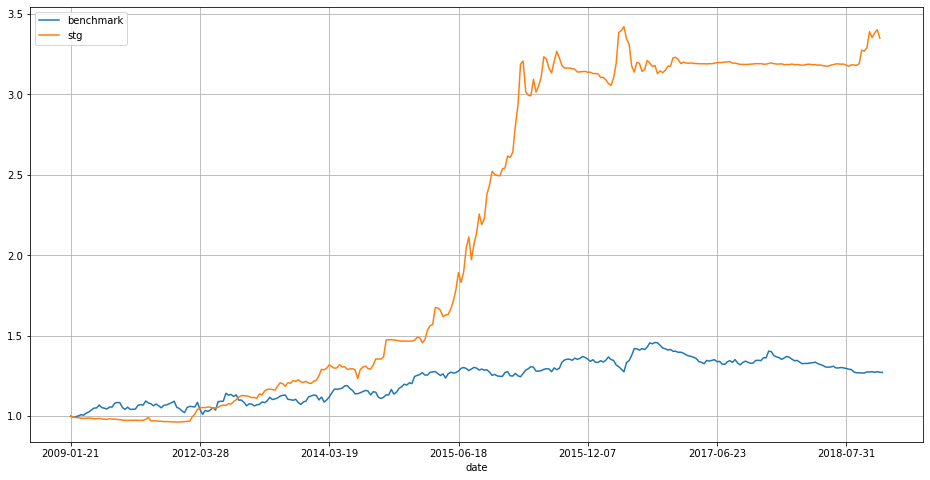

In [100]:
(bench.set_index('date')[['benchmark','stg']]).plot(figsize=(16,8),grid=True)
# (bench.set_index('date')[['ret','pct_chg']]).cumsum().plot(figsize=(16,8),grid=True)

In [101]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret,stg,benchmark
0,2009-01-21,-0.001718,2009-01-21,0.0,0.0,0.0,0.1,-0.003125,1.000000,1.000000
1,2009-02-17,-0.031253,2009-02-17,0.0,0.0,0.0,0.1,-0.004588,0.995412,0.993308
2,2009-02-18,-0.045885,2009-02-18,0.0,0.0,0.0,0.1,-0.004507,0.990925,0.997137
3,2009-02-24,-0.045067,2009-02-24,0.0,0.0,0.0,0.1,0.000104,0.991029,1.002201
4,2009-02-25,0.001044,2009-02-25,0.0,0.0,0.0,0.1,-0.003706,0.987356,1.009149
...,...,...,...,...,...,...,...,...,...,...
310,2018-10-29,-0.030484,2018-10-29,2.0,0.0,0.0,-1.0,-0.010846,3.352572,1.276279
311,2018-10-30,0.010846,2018-10-30,2.0,0.0,0.0,-1.0,0.008331,3.380503,1.272852
312,2018-11-05,-0.008331,2018-11-05,2.0,0.0,0.0,-1.0,0.006033,3.400897,1.276514
313,2018-11-06,-0.006033,2018-11-06,2.0,0.0,0.0,-1.0,-0.015481,3.348248,1.272580


<AxesSubplot:xlabel='date'>

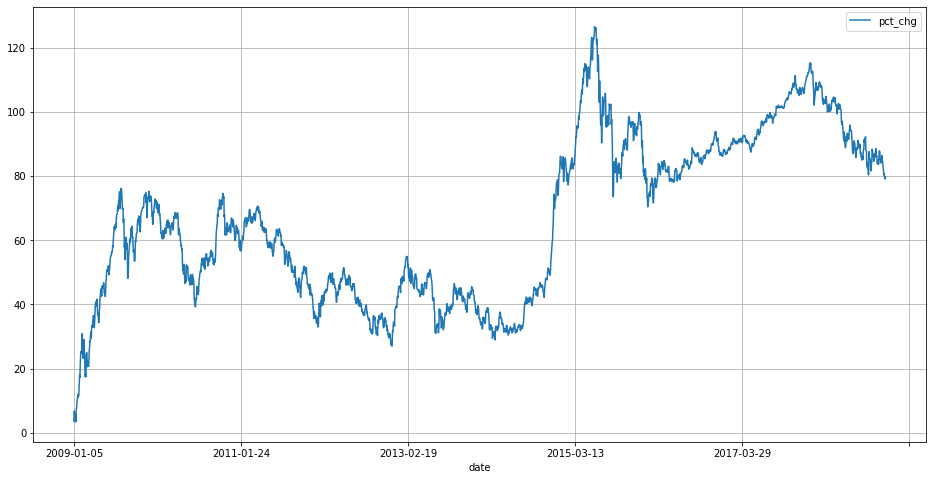

In [102]:
(b.set_index('date')[['pct_chg']]).cumsum().plot(figsize=(16,8),grid=True)

# 策略评价

## 年化收益率

In [223]:
bench['ret'].mean() * 252

1.0061943477707007

In [224]:
bench['benchmark'] = bench['pct_chg']

In [225]:
#大盘同期收益表现
bench['benchmark'].mean() * 252

-1.5943872000000001

## 年化波动率 

In [226]:
bench['ret'].std() * 252 ** 0.5

0.27506272000199095

In [227]:
bench['benchmark'].std() * 252 ** 0.5

0.3224707273427751

## 计算策略的夏普比率

In [228]:
#技术指标策略
(bench['ret'].mean() * 252 - 0.02) / (bench['ret'].std() * 252 ** 0.5)

3.5853435455141374

## 计算策略的信息比率

In [229]:
(bench['ret'].mean() * 252) / (bench['ret'].std() * 252 ** 0.5)

3.6580542349156504

## 计算最大回撤

In [230]:
def MaxDrawdown(return_list):
    '''最大回撤率'''
    i = np.argmax((np.maximum.accumulate(return_list) - return_list) / np.maximum.accumulate(return_list))  # 结束位置
    if i == 0:
        return 0
    j = np.argmax(return_list[:i])  # 开始位置
    return (return_list[j] - return_list[i]) / (return_list[j])

In [231]:
MaxDrawdown(bench['ret'])

36.50095785440613

# 胜率

In [149]:
len(bench[bench.ret>=0])/len(bench)

0.5492063492063493

In [103]:
bench

,date,pct_chg,TRADE_DATE,total_buy,r1,r2,buy,ret,stg,benchmark
0,2009-01-21,-0.001718,2009-01-21,0.0,0.0,0.0,0.1,-0.003125,1.000000,1.000000
1,2009-02-17,-0.031253,2009-02-17,0.0,0.0,0.0,0.1,-0.004588,0.995412,0.993308
2,2009-02-18,-0.045885,2009-02-18,0.0,0.0,0.0,0.1,-0.004507,0.990925,0.997137
3,2009-02-24,-0.045067,2009-02-24,0.0,0.0,0.0,0.1,0.000104,0.991029,1.002201
4,2009-02-25,0.001044,2009-02-25,0.0,0.0,0.0,0.1,-0.003706,0.987356,1.009149
...,...,...,...,...,...,...,...,...,...,...
310,2018-10-29,-0.030484,2018-10-29,2.0,0.0,0.0,-1.0,-0.010846,3.352572,1.276279
311,2018-10-30,0.010846,2018-10-30,2.0,0.0,0.0,-1.0,0.008331,3.380503,1.272852
312,2018-11-05,-0.008331,2018-11-05,2.0,0.0,0.0,-1.0,0.006033,3.400897,1.276514
313,2018-11-06,-0.006033,2018-11-06,2.0,0.0,0.0,-1.0,-0.015481,3.348248,1.272580


In [107]:
datas = bench.set_index('date')[['stg','benchmark']]

In [108]:
# 定义函数求各项回测指标
def ratio(datas):
    res = []
    for item in datas:
        data = datas[item]
        
        # 累积收益率        
        strategy_cum = (data + 1).cumprod()
        # 年化收益率
        return_year = data.mean() * 252
        # 每日收益率      
        return_avg = data.mean() 
        # 年化波动率
        volatility = data.std() * 252 ** 0.5
        # 最大每日收益
        profit_max = data.max()
        # 最大每日损失
        loss_max = data.min()
        # 信息比率               
        ir = return_year / volatility
        # 上涨天数
        num_of_up = data[data > 0].count()
        # 下跌天数
        num_of_down = data[data < 0].count()
        # 胜率
        win_rate = float(num_of_up) / (num_of_up + num_of_down)
        # 上涨时平均每日收益率
        gain_of_up = data[data > 0].mean()
        # 下跌时平均每日收益率        
        loss_of_down = data[data < 0].mean()
        # 盈亏比
        profit_loss_ratio = -(gain_of_up / loss_of_down)
        # 最大回撤
        drawdown = ((strategy_cum.cummax() - strategy_cum)/strategy_cum.cummax()).max()
        
        # 创建一个临时的DataFrame
        tmp = pd.DataFrame([ir, float((strategy_cum).tail(1)), return_year, return_avg, volatility, profit_max, loss_max,  
                            num_of_up, num_of_down, win_rate, gain_of_up, loss_of_down, profit_loss_ratio, drawdown], 
                           columns=[data.name], 
                           index=['Information Ratio', 'Cumulative Return', 'Annualised Return', 'Average return', 'Annualised Volatility', 'Maximum Daily Profit', 
                                  'Maximum Daily Loss', 'Number of Up Periods', 'Number of Down Periods', 'Win Rate', 'Avg Gain in Up Periods', 
                                  'Avg Loss in Down Periods', 'Profit and Loss Ratio', 'Maximum Drawdown'])
        res.append(tmp)
    # 返回拼接好的DataFrame
    return pd.concat(res,axis=1,join='inner')

In [109]:
ratio(datas)

,stg,benchmark
Information Ratio,35.234057,1.566467e+02
Cumulative Return,NaN,2.037204e+109
Annualised Return,546.367840,3.091706e+02
Average return,2.168126,1.226868e+00
Annualised Volatility,15.506811,1.973681e+00
Maximum Daily Profit,3.420103,1.458117e+00
Maximum Daily Loss,0.963644,9.933078e-01
Number of Up Periods,314.000000,3.150000e+02
Number of Down Periods,0.000000,0.000000e+00
Win Rate,1.000000,1.000000e+00
